## Demonstration of the GroebnerWalk package

This is a demonstration of the functionality of the GroebnerWalk julia package. The package and installation instructions may be found under 

https://github.com/ooinaruhugh/GroebnerWalk.jl

## Baby steps 

Let us perform some Gröbner basis computations on the ideal $$I = \langle x^2 + yz \ , \  xy + z^2 \rangle \triangleleft \mathbb{Q}[x,y,z]$$
We start by loading OSCAR and the package: 



In [ ]:
using Oscar, GroebnerWalk

We then define the ideal, and perform a first Gröbner basis computation to compile the groebner_basis function. 

In [ ]:
R, (x,y,z) = polynomial_ring(QQ, ["x", "y", "z"]) #define the ring

I = ideal([x^2 + y*z, x*y + z^2]) #define the ideal
 
groebner_basis(I) #compile groebner_basis

We may compute a lexicographic basis of I w.r.t the lexicographic ordering by calling "groebner_walk(I)"

In [ ]:
groebner_walk(I)

More information on the intermediate steps can be obtained by modifying the value of set_verbosity_level. 

In [ ]:
set_verbosity_level(:groebner_walk, 1)
groebner_walk(I)

The starting and target orderings may be specified by two additional arguments. The steps of the Gröbner walk change accordingly. 

In [ ]:
start_order = lex(R)

target_order = matrix_ordering(R, [1 3 0; 1 1 1; 1 0 0 ])

G_target = groebner_walk(I, target_order, start_order)


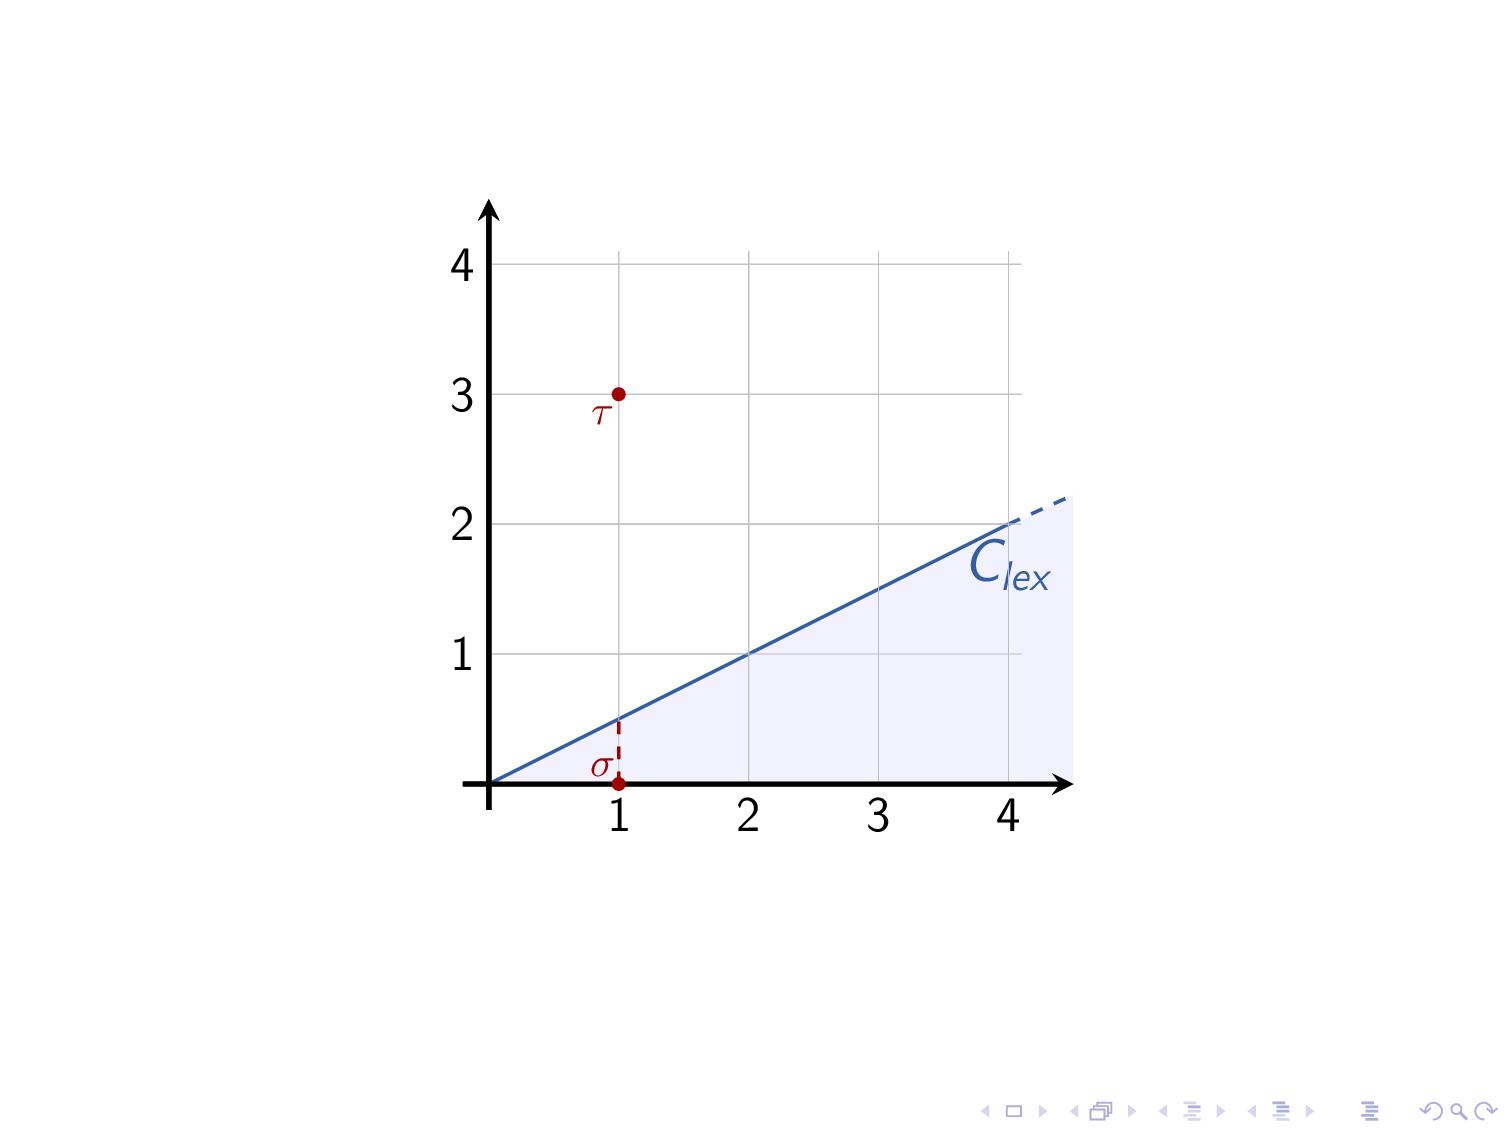

The specific choice of walk may be specified by the optional "algorithm" keyword argument.

In [ ]:
groebner_walk(I, target_order, start_order, algorithm = :generic)

# Larger examples

Now assume we are tasked with computing a lexicographic Gröbner basis of the ideal 

$$I = \langle 6 + 3x^3+16x^2z+14x^2y^3 \ , \ 6+y^3z+17x^2z^2+7xy^2z^2+13x^3z^2 \rangle$$.

An approach involving groebner_basis doesn't terminate on this machine due to memory overload! 

Let us try a Groebner walk... 


In [ ]:
I = ideal([6 + 3*x^3+16*x^2*z+14*x^2*y^3, 6+y^3*z+17*x^2*z^2+7*x*y^2*z^2+13*x^3*z^2])
G = groebner_walk(I) 

In [ ]:
is_groebner_basis(G, ordering = lex(R))

Here are some selected benchmarks. 
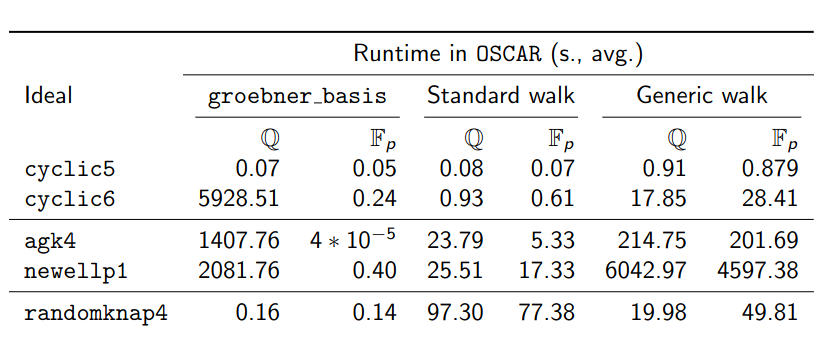


Our package provides additional information about the walk which may be useful, e.g. for visualizations! 

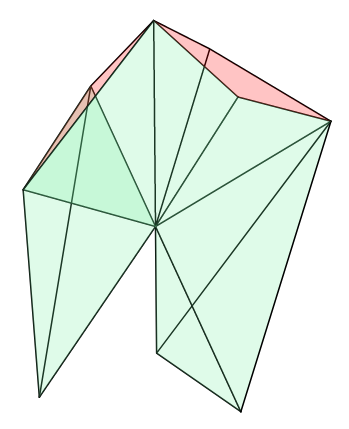


